# Neural Style Transfer in TensorFlow2 (Low Style Weight)
This code is slightly modified from TensorFlow's official tutorial (https://www.tensorflow.org/tutorials/generative/style_transfer), which implements
`A Neural Algorithm of Artistic Style` (Gatys et al.) (https://arxiv.org/abs/1508.06576)

In [1]:
import tensorflow as tf
from model import *

## Load Images

In [2]:
# Load images
content_image = load_img('img/napoleon_on_tsunami.jpg', dim=800)
style_image = load_img('img/kaiju_rotate.jpg', dim=800)

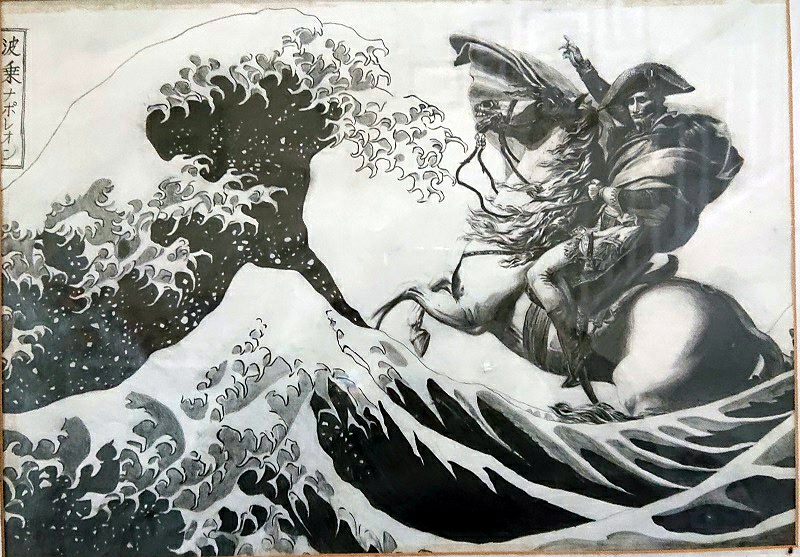

In [3]:
# Content
tensor_to_image(content_image)

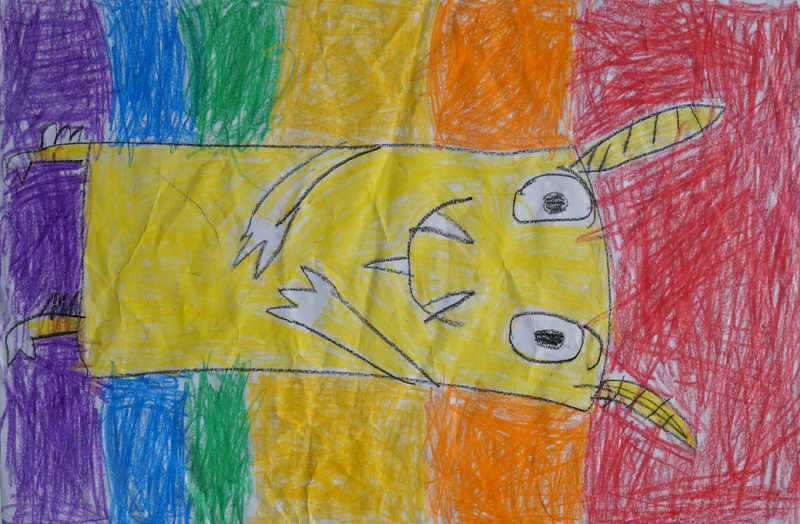

In [4]:
# Style
tensor_to_image(style_image)

## Load Model

In [5]:
# Content layer for feature maps
content_layers = ['block2_conv2'] 

# Style layer of interest
style_layers = ['block1_conv1',
                'block1_conv2',
                'block2_conv1', 
                'block2_conv2', 
                'block3_conv1']

In [6]:
# Convert content image to tensor
image = tf.Variable(content_image)

model = neural_style_transfer_model(image=image,
                                    style_image=style_image,
                                    content_image=content_image,
                                    style_layers=style_layers,
                                    content_layers=content_layers)

In [7]:
# Weights
style_weight = 2
content_weight = 1e3

lr = 0.02
# Optimizer (LBFGS is not available in TF2.0)
opt = tf.optimizers.Adam(learning_rate=lr, beta_1=0.99, epsilon=1e-1)

# Decrease high frequency artifacts (regularization)
total_variation_weight = 30

model.compile(style_weight=style_weight,
              content_weight=content_weight,
              opt=opt,
              total_variation_weight=total_variation_weight)

## Train

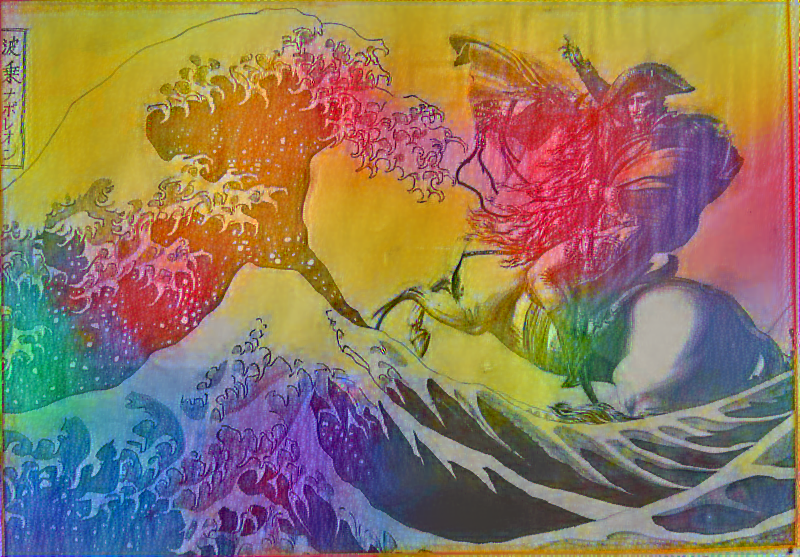

Train step: 3000


In [8]:
epochs = 30
steps_per_epoch = 100

# Image name for saving
img_name = "img/surfing_napoleon_crayon_content"

model.fit(epochs=epochs,
          steps_per_epoch=steps_per_epoch,
          save_image=True,
          img_name=img_name,
          display_image=True)